### Step 1 :
**Import Basic Scikit Learn Librarirs for Data manipulation as Well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s-%(message)s')

### Step 2 :
**Data Uploading Using Pandas Function.**

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/SakshiBagul1610/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv '

df = pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
859,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09
540,480.0,0.0,0.0,192.0,0.0,936.2,712.2,3,24.40
707,200.0,133.0,0.0,192.0,0.0,965.4,806.2,90,43.25
934,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
...,...,...,...,...,...,...,...,...,...
799,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,3,41.64
726,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,3,14.31
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
787,331.0,0.0,0.0,192.0,0.0,978.0,825.0,90,37.23


### Step 3 :
**Doing Exploratory Data Analysis [EDA] : --->**
1. Univariate Analysis
2. Bi Variate Analysis

In [3]:
from collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Median': df[i].median(),
        'Mean': df[i].mean(),
        'Min' : df[i].min(),
        'Max' : df[i].max(),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQWR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing', 'Unique', 'Mode', 'Median', 'Mean', 'Min', 'Max', 'Standard Deviation', 'Variance', 'Skewness', 'Kurtosis', 'IQWR'], cmap='Blues')

,Feature,Type,Missing,Unique,Mode,Median,Mean,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,IQWR
0,cement,float64,0,278,362.600000,272.900000,281.167864,102.000000,540.000000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,22.000000,73.895825,0.000000,359.400000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,0.000000,54.188350,0.000000,200.100000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,float64,0,195,192.000000,185.000000,181.567282,121.800000,247.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.400000,6.204660,0.000000,32.200000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,968.000000,972.918932,801.000000,1145.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,779.500000,773.580485,594.000000,992.600000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,int64,0,14,28.000000,28.000000,45.662136,1.000000,365.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,34.445000,35.817961,2.330000,82.600000,16.705742,279.081814,0.416977,-0.313725,22.425000


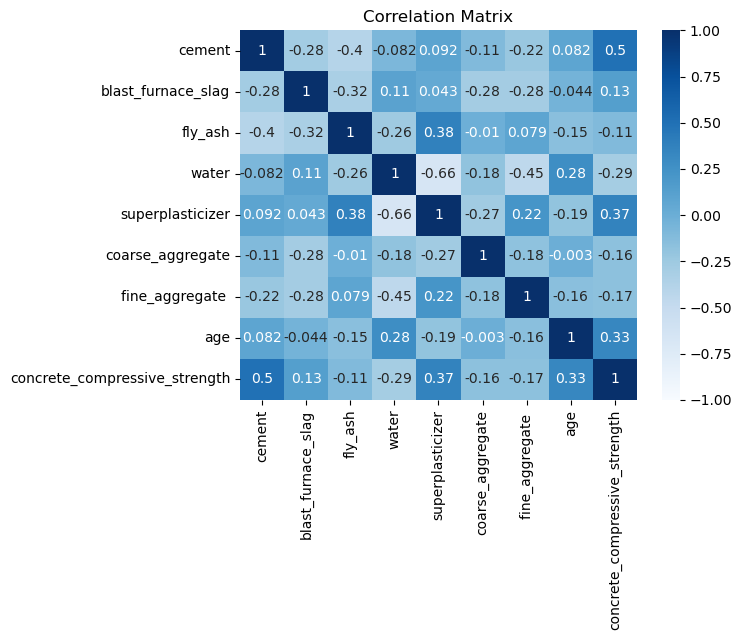

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and Create New Features Based on Existing Features---> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

### **Feature Engineering :**

In [19]:
df['Composite_Ratio'] = 1 / (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag']) / (df['water'])

In [20]:
df['cement_To_water_ratio'] = 1 / df['cement'] / df['water']

In [21]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
cement_To_water_ratio           -0.381603
Name: concrete_compressive_strength, dtype: float64

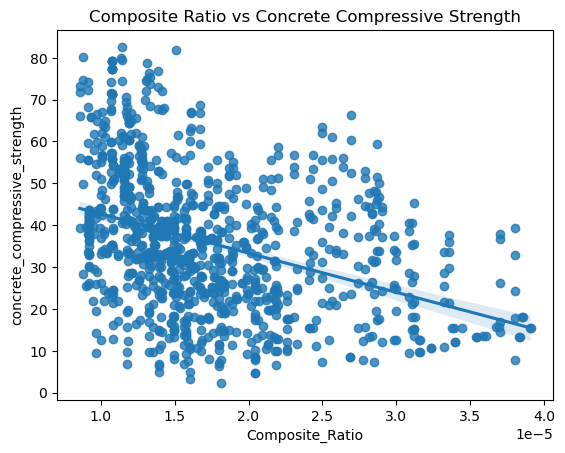

In [9]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

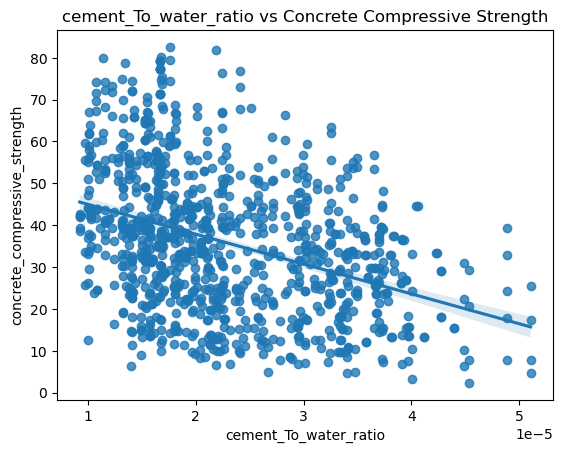

In [10]:
sns.regplot(x = df['cement_To_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('cement_To_water_ratio vs Concrete Compressive Strength')
plt.show()

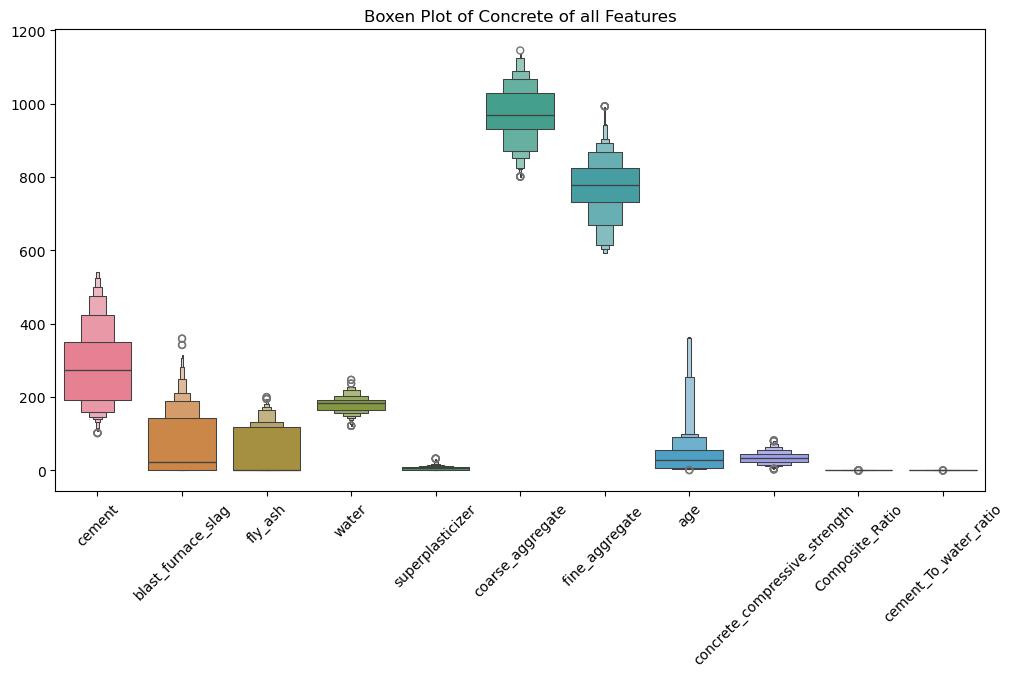

In [33]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data = df)
plt.xticks(rotation = 45)  # Rotate the X-axis labels for better readability
plt.title("Boxen Plot of Concrete of all Features")
plt.show()

In [11]:
# Use Variance Inflation Factor (VIF) to Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns = ['concrete_compressive_strength']) # All Independent Variables
x = x.assign(constant = 1)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Drop the Constant Column From the Result
vif_data = vif_data[vif_data["feature"]!= "constant"]

# Display the VIF values
print(vif_data)

                 feature        VIF
0                 cement  17.538853
1     blast_furnace_slag  11.364676
2                fly_ash   6.245986
3                  water   9.126844
4       superplasticizer   3.017690
5       coarse_aggregate   5.192764
6        fine_aggregate    7.144424
7                    age   1.128654
8        Composite_Ratio  10.629273
9  cement_To_water_ratio   8.501630


## **Data Insights :**

1. Higher value of VIF Suggest Multi Collinearity. [VIF > 10] ---> Column Shows Multicollinearity.

2. Such Columns Must be removed before applying Linear Regression Model.

### Step 4 :

**Spliting the Dataset into Training Set and Using Train and Test Split to Prevent Data Lekage.**

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = 'concrete_compressive_strength', axis = 1)
y = df['concrete_compressive_strength']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
# Using Scaling Technique

from sklearn.preprocessing import MinMaxScaler

scalaer = MinMaxScaler()

x_train = scalaer.fit_transform(x_train)
x_test = scalaer.transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

r2_score_LR = r2_score(y_test, y_pred_LR)
r2_score_LR

0.6061044311281715

In [17]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)

r2_score_DT = r2_score(y_test, y_pred_DT)

print(f'The R2 Score for Decision Tree Regression Model: {r2_score_DT * 100}%')

The R2 Score for Decision Tree Regression Model: 83.33973302071472%


In [31]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor  

RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

print(f'The R2 Score for Random Forest Regression Model: {r2_score_RF * 100}%')

The R2 Score for Random Forest Regression Model: 90.09572098309326%


In [25]:
# checking Model Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'The Mean Squared Error for Linear Regression Model: {mse_LR}')

print(f'The Mean Squared Error for Decision Tree Model: {mse_DT}')

print(f'The Mean Absolute Error for Linear Regression Model: {mae_LR}')

print(f'The Mean Absolute Error for Decision Tree Regression Model: {mae_DT}')

The Mean Squared Error for Linear Regression Model: 106.57800455295676
The Mean Squared Error for Decision Tree Model: 45.07839514563106
The Mean Absolute Error for Linear Regression Model: 8.187197567877964
The Mean Absolute Error for Decision Tree Regression Model: 4.4016504854368925


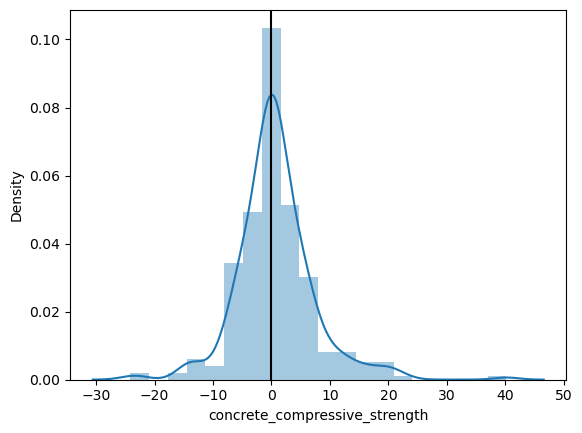

In [28]:
# For Decision Tree Model

sns.distplot(y_test - y_pred_DT, bins = 20)
plt.axvline(0, color = 'k')

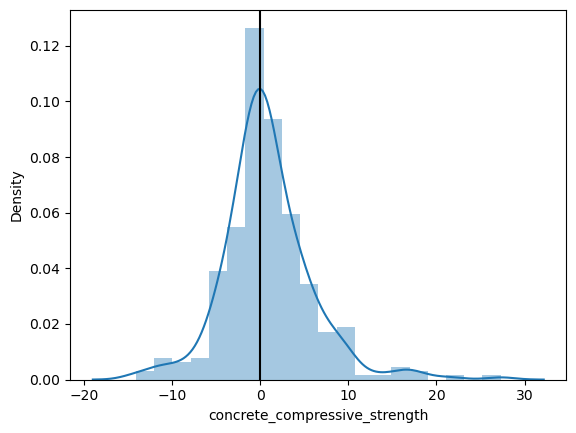

In [32]:
# For Random Forest Model

sns.distplot(y_test - y_pred_RF, bins = 20)
plt.axvline(0, color = 'k')

In [34]:
pip install XGBoost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.2/150.0 MB 31.9 MB/s eta 0:00:05
   --- ------------------------------------ 12.3/150.0 MB 32.2 MB/s eta 0:00:05
   ----- ---------------------------------- 19.1/150.0 MB 31.8 MB/s eta 0:00:05
   ------ --------------------------------- 25.7/150.0 MB 31.9 MB/s eta 0:00:04
   -------- ------------------------------- 31.7/150.0 MB 31.0 MB/s eta 0:00:04
   ---------- ----------------------------- 37.7/150.0 MB 30.8 MB/s eta 0:00:04
   ----------- ---------------------------- 44.6/150.0 MB 30.5 MB/s eta 0:00:04
   ------------- -------------------------- 49.3/150.0 MB 29.6 MB/s eta 0:00:04
   -------------- ------------------------- 54.0/150.0 MB 28.9 MB/s eta 0:00:04
   ---------------- ----------------------- 60.6/150.0 MB 29.0 MB/s eta 0:00:04
   ----------------- ---------------------- 67.1/150.0 MB 29.1 MB/s eta 0:00:03
   ------------------- -------------------- 73.1/

In [35]:
# Using Boosting Algorithm

import xgboost as xgb

XGB = xgb.XGBRegressor()
XGB.fit(x_train, y_train)

y_pred_XGB = XGB.predict(x_test)
r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Regression Model: {r2_score_XGB * 100}%')

The R2 Score for XGBoost Regression Model: 92.12639026410865%


In [36]:
pip install ada-boost

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Using Adaboost Algorithm

from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()
ADA.fit(x_train, y_train)

y_pred_ADA = ADA.predict(x_test)
r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for XGBoost Regression Model: {r2_score_ADA * 100}%')

The R2 Score for XGBoost Regression Model: 77.74143557292584%
